In [1]:
%matplotlib inline
import numpy as np
#import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
#print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join,QTable
from astropy.table import unique as tab_unique
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

from astropy.table import setdiff

from scipy.stats import ks_2samp
#import ndtest

import sys

from matplotlib.colors import LinearSegmentedColormap


/home/sanchez/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2.2.0


In [2]:
from diagnostic_diagrams_plots import diagnostic_diagram_plot
from diagnostic_diagrams_plots import main_plot_function
from misc import kewley
from utils_plot import textonly, textonly2

In [3]:
def plot_diagnostic_diagram_single(type_plot: str, statistic: str,
                                   prop: str,
                                   data: pd.DataFrame,
                                   ax: plt.Axes,
                                   vmin=None, vmax=None,
                                   histogram=False) -> mpl.image.AxesImage:
    """
    Diagnostic diagrams plotting auxiliary function
    """
    ylabel = 'log_OIII_Hb_cen'
    if type_plot == 'O3N2':
        xlabel = 'log_NII_Ha_cen'
    elif type_plot == 'O3S2':
        xlabel = 'log_SII_Ha_cen'
    elif type_plot == 'O3O1':
        xlabel = 'log_OI_Ha_cen'
    elif type_plot == 'O3O2':
        xlabel = 'log_OII_Hb_cen'
    x_data = data[xlabel]
    y_data = data[ylabel]
    z_data = data[prop]
    mean_prop = np.mean(z_data)
    std_prop = np.std(z_data)
    # print(prop, mean_prop, std_prop)
    if statistic == 'mean':
        if vmin is None:
            if prop == 'Av':
                vmin = 0
            else:
                vmin = mean_prop - 3*std_prop
        if vmax is None:
            if prop == 'Av':
                vmax = 2*mean_prop
            else:
                vmax = mean_prop + 3*std_prop
    elif statistic == 'std':
        if vmin is None:
            vmin = 0
        if vmax is None:
            vmax = 2*std_prop
    plot = diagnostic_diagram_plot(x_data, y_data, z_data, type_plot=type_plot,
                                   vmin=vmin, vmax=vmax, ax=ax,
                                   statistic=statistic)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.tick_params(axis='both', which='both', direction='in', top=True,
                   right=True)
    if histogram:
        axis_ins = ax.inset_axes([0.05, 0.10, 0.35, 0.15])
        counts, bins, _ = axis_ins.hist(z_data, bins=60, density=True,
                                        range=(vmin, vmax), color='k')
        axis_ins.plot([mean_prop, mean_prop], [0, max(counts)], 'r--', lw=1)
        msg = r"${}\pm{}$".format(np.round(mean_prop, 2),
                                  np.round(std_prop, 2))
        if prop == 'f_y':
            y_pos = mean_prop+.05
        else:
            y_pos = mean_prop-1.5*np.abs(mean_prop)
#            y_pos = mean_prop+.15
        axis_ins.text(y_pos, max(counts)*(1.1), msg, {'fontsize': 14})
        axis_ins.spines['top'].set_visible(False)
        axis_ins.spines['right'].set_visible(False)
        axis_ins.spines['left'].set_visible(False)
        axis_ins.set_yticks([])
        #axis_ins.set_xticklabels([])
        axis_ins.patch.set_alpha(0.1)
        #axis_ins.set_xticks(get_ticks_hist(prop))
    return plot


In [4]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
color_cm_r = color_cm_now.reversed()



In [5]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   1.5,\
           'ytick.minor.size'        :   1.5,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   0.5,\
           'ytick.minor.width'       :   0.5,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [6]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc



#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=-10000 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= 0.5*sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc



def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_2Dhist(x_par=None,y_par=None,z_par=None,x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]    
    if (labels_zbins==None):    
        labels_zbins=np.zeros(n_zbins)
    #print(labels_zbins,delta_z)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
#        print(z_bins,z_bin_min,z_bin_max)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
#        print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig('fig/'+figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
    
    
    
def plot_2Dhist_map(x_par=None,y_par=None,z_par=None,\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear',contour=0,\
                   if_fit=0,conts=[0.95,0.65,0.40],med=0):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)

#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    X=[]
    Y=[]
    C=[]
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        if (med==0):
            x_mean=np.mean(x_par[mask_z_par])
            y_mean=np.mean(y_par[mask_z_par])
        else:
            x_mean=np.median(x_par[mask_z_par])
            y_mean=np.median(y_par[mask_z_par])
        X.append(x_mean)
        Y.append(y_mean)
        C.append(indx)
        print(labels_zbins[indx],x_mean,y_mean,y_mean/x_mean,y_mean-x_mean)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)
    
    if (contour==1):
        my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
                   nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,zorder=100)
#    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    cmap_now = LinearSegmentedColormap.from_list('cmap_now', mapcolors, N=len(mapcolors))
    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
               cmap=cmap_now,alpha=alpha)

#    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
#               cmap=cmap_truncate,alpha=alpha)
   
    if (if_fit==1):
        pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_par,\
                                              x_min,x_max,y_min,y_max,z_min,z_max,'',\
                                              '',-2,title='', fit_title='', Delta=(x_max-x_min)/50,\
                                             if_contour=0, if_bin=1, if_scatter=0, max_c=0.95,den_par_min=0.85)
        x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
        y_plot=pa1[0]+pa1[1]*x_plot
        fact=1.0
        l_b=np.round(pa1[0],2)
        l_a=np.round(pa1[1],2)
        r_now=rc[0,1]
        l_r=np.round(r_now,2)
        l_s=np.round(s_dy_par*fact,2)
        label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
        p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black',\
                        color ='black',zorder=10,label=label,alpha=0.85)

        
    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
#    ax_histy.set_ylim(y_min,y_max)
#    ax_histx.set_xlim(x_min,x_max)
    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label).set_zorder(10000)#,\
#             framealpha=None)
#.set_zorder(100)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########

def comp_plot_hist(x_par=None,y_par=None,\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None,\
                  x_min_p=None,x_max_p=None,y_min_p=None,y_max_p=None,fsize=(6,6), x_r=0, y_r=0):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=fsize)
    left, width = 0.17, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)   
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    if (one is None):
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    #sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
    #            color="grey")#,gridsize=int(len(rat[mask])/2)
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 2.)
    max_kde_xx=np.max(kde_xx(xx))
    yy=(kde_xx(xx))/np.max(kde_xx(xx))
    ax_histx.fill_between(xx,0*yy,yy,color='grey',alpha=alpha)
    ax_histx.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
    
    par=y_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    xx=(kde_yy(yy))/np.max(kde_yy(yy))
    ax_histy.fill_betweenx(yy,0*xx,xx,color='grey',alpha=alpha)
    ax_histy.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
        
    #ax_histx.spines['right'].set_visible(False)
    #ax_histx.spines['top'].set_visible(False)
    #ax_histx.spines['left'].set_visible(False)
    #ax_histx.get_yaxis().set_visible(False)
    #ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    
#    ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    #ax.set_xticks(ax.get_yticks())
    if (x_min_p==None):
        x_min_p=x_min
        x_max_p=x_max
        y_min_p=y_min
        y_max_p=y_max
    ax.set_xlim([x_min_p,x_max_p])
    ax.set_ylim([y_min_p,y_max_p])
#    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    if (x_r==1):
        ax.set_xlim([x_max_p,x_min_p])
    if (y_r==1):
        ax.set_ylim([y_max_p,y_min_p])


    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    
    return fig,ax,mean,std


In [7]:
def find_bins_fix(data, min_points_per_bin, min_bin_width):
    """
    Function to find bins that fulfill two criteria:
    1. Minimum number of points in each bin
    2. Minimum width of the bins
    
    Parameters:
    - data: 1D array of data points
    - min_points_per_bin: Minimum number of points required in each bin
    - min_bin_width: Minimum width required for each bin
    
    Returns:
    - bins: List of bin edges that fulfill the criteria
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Initialize bins list with the first bin
    bins = [sorted_data[0]]
    
    # Iterate through the sorted data to find bin edges
    for i in range(1, len(sorted_data)):
        if sorted_data[i] - bins[-1] >= min_bin_width:
            # Check if adding the next point forms a bin with sufficient width
            if i >= min_points_per_bin:
                # Check if there are enough points in the current bin
                bins.append(sorted_data[i])
    
    # Append the last data point to complete the last bin
    bins.append(sorted_data[-1])
    
    return bins


In [8]:
def find_bins(data, min_points_per_bin, min_bin_width):
    """
    Function to find bins that fulfill two criteria:
    1. Minimum number of points in each bin
    2. Minimum width of the bins, with an option to increase the minimum width if the number of points is not reached
    
    Parameters:
    - data: 1D array of data points
    - min_points_per_bin: Minimum number of points required in each bin
    - min_bin_width: Minimum width required for each bin
                      If the number of points in a bin is less than min_points_per_bin, 
                      the function will try to increase the bin width until the number of points meets the requirement
    
    Returns:
    - bins: List of bin edges that fulfill the criteria
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Initialize bins list with the first bin
    bins = [sorted_data[0]]
    
    # Iterate through the sorted data to find bin edges
    for i in range(1, len(sorted_data)):
        if sorted_data[i] - bins[-1] >= min_bin_width:
            # Check if adding the next point forms a bin with sufficient width
            if i - len(bins) >= min_points_per_bin:
                # Check if there are enough points in the current bin
                bins.append(sorted_data[i])
            else:
                # Increase the minimum bin width until the number of points requirement is met
                while i - len(bins) < min_points_per_bin:
                    bins[-1] = sorted_data[i]  # Increase the end of the current bin
                    if i - len(bins) >= min_points_per_bin:
                        bins.append(sorted_data[i])  # Add the next point to start a new bin
                        break
    
    # Append the last data point to complete the last bin
    bins.append(sorted_data[-1])
    
    return bins


In [9]:
#
# MaStar CoSha template
#
DIR="/disk-a/sanchez/LVM/LVM/templates/"
MaStar_file="stellar-basis-spectra-9795.fits.gz"
#MaStar_file="stellar-basis-spectra-14473.fits.gz";
hdu=fits.open(f'{DIR}/{MaStar_file}')
tab=Table(hdu[1].data)  
hdu[0].data=np.float32(hdu[0].data)



In [10]:
hdu.info()

Filename: /disk-a/sanchez/LVM/LVM/templates//stellar-basis-spectra-9795.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (6351, 9795)   float32   
  1  PARAMETERS    1 BinTableHDU     24   9795R x 5C   ['E', 'E', 'E', 'E', 'E']   


In [11]:
#
# Some statistics
#
rss_sec=hdu[0].data[:,330:440]
mean_sec=np.median(rss_sec,axis=1)
std_sec=np.std(rss_sec,axis=1)
SN_sec=mean_sec/std_sec
SN_lim = 10
mask_EL = hdu[0].data[:,320] < 0.5*(hdu[0].data[:,310]+hdu[0].data[:,330])
mask_EL = mask_EL & (hdu[0].data[:,2913] < 0.5*(hdu[0].data[:,2890]+hdu[0].data[:,2933]))
mask_SN = (SN_sec>SN_lim) & mask_EL


mask_flux = tab['FNORM']>10*1e-16   




print(len(SN_sec[mask_SN & mask_flux]))

5370


In [12]:
#stellar-basis-spectra-100.fits.gz
#MaStar_file_few="stellar-basis-spectra-100.fits.gz"
DIR_few='/disk-a/sanchez/LVM/LVM/templates/_basis-binned_mastar/'
MaStar_file_few="stellar-basis-spectra-binned-110-mastar.fits.gz"
hdu_few=fits.open(f'{DIR_few}/{MaStar_file_few}')
tab_few=Table(hdu_few[1].data)  


In [13]:
tab_few[1:10]

TEFF,LOGG,MET,ALPHAM,FNORM
float32,float32,float32,float32,float32
3.5848129,0.96934044,-0.17101775,0.059326753,4.872131e-13
3.6054523,1.6098188,0.051067837,0.050663628,3.4111792e-13
3.555576,1.6946299,-0.095880955,0.23282504,3.4614558e-13
3.5910213,2.7394776,-0.085675254,0.087063126,5.9568957e-13
3.6312158,0.89137733,-1.736214,0.077756345,9.6140896e-14
3.6284778,1.2423924,-1.1176242,0.13707659,5.400619e-14
3.64038,1.2982119,-1.054105,0.22368646,4.1788044e-12
3.6234102,1.2667856,-0.39506394,0.07309432,6.442424e-14
3.6309154,0.58727163,-0.31407925,0.4360498,3.29548e-13


(array([0.0005    , 0.00116667, 0.00166667, 0.00166667, 0.00066667,
        0.00166667, 0.001     , 0.001     , 0.        , 0.00066667]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

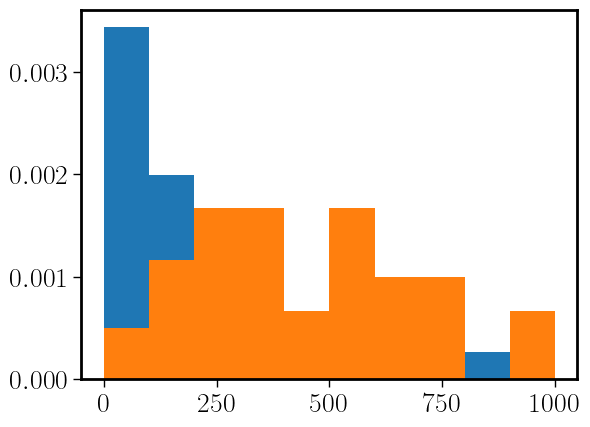

In [14]:
val=tab['FNORM']*1e16
binwidth=100
bins=bins=range(0,1000+binwidth, binwidth)
plt.hist(tab['FNORM']*1e16,bins,density=True)
plt.hist(tab_few['FNORM']*1e16,bins,density=True)



(array([ 223., 1284., 1373., 1429., 1092., 2544.,  880.,  362.,  381.,
         227.]),
 array([3.47114015, 3.52894354, 3.58674717, 3.6445508 , 3.70235419,
        3.76015759, 3.81796122, 3.87576485, 3.93356824, 3.99137163,
        4.04917526]),
 <BarContainer object of 10 artists>)

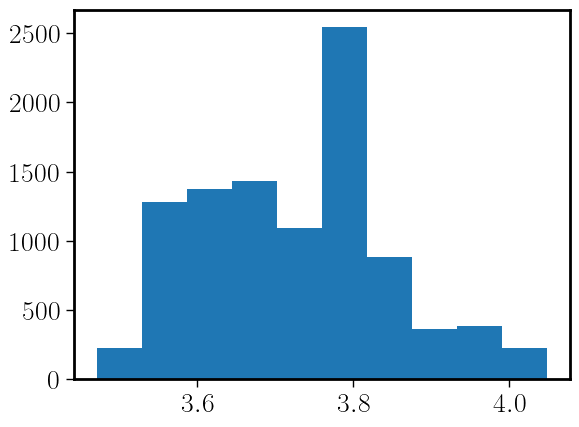

In [15]:
plt.hist(tab['TEFF'])

(array([  53.,  607.,  739.,  606.,  677.,  853., 1151., 3056., 1851.,
         202.]),
 array([-0.25544223,  0.31078416,  0.87701058,  1.44323695,  2.00946331,
         2.57568979,  3.14191604,  3.70814252,  4.27436876,  4.84059525,
         5.40682173]),
 <BarContainer object of 10 artists>)

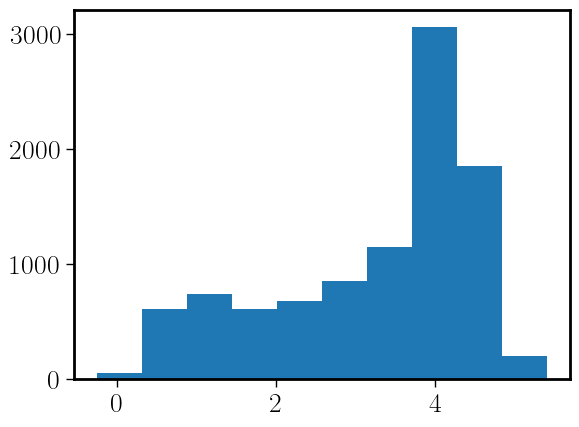

In [16]:
plt.hist(tab['LOGG'])

(array([  11.,   32.,  109.,  173.,  248.,  629., 1175., 4022., 3177.,
         219.]),
 array([-3.93793082, -3.46720862, -2.99648643, -2.52576423, -2.05504203,
        -1.58431983, -1.11359763, -0.64287543, -0.17215323,  0.29856896,
         0.76929116]),
 <BarContainer object of 10 artists>)

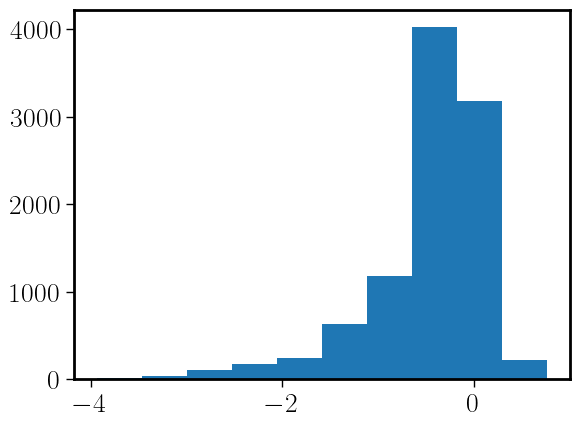

In [17]:
plt.hist(tab['MET'])

(array([1.020e+02, 1.534e+03, 5.832e+03, 1.632e+03, 4.160e+02, 1.680e+02,
        7.500e+01, 2.400e+01, 9.000e+00, 3.000e+00]),
 array([-0.25846446, -0.12136763,  0.01572919,  0.15282601,  0.28992283,
         0.42701966,  0.56411648,  0.7012133 ,  0.83831012,  0.97540694,
         1.11250377]),
 <BarContainer object of 10 artists>)

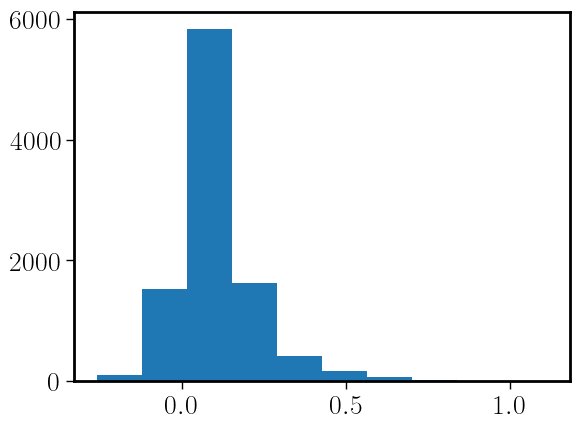

In [18]:
plt.hist(tab['ALPHAM'])

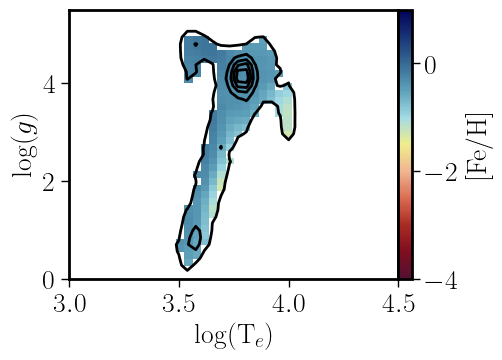

In [19]:
fig, ax = plt.subplots(figsize=(5,3.5))
params={}
params['xlim']=[3,4.5]
params['ylim']=[0,5.5]
params['norm_value']=None
params['vmin']=-4
params['vmax']=1
params['cmap']=color_cm_r
params['levels']=[0.05, 0.25, 0.45, 0.65, 0.85]
params['dcurves']=False
x = tab['TEFF']
y = tab['LOGG']
z = tab['MET']
mask_now = (x>0) & (y>-6) & (z>-100)
plot=main_plot_function(x[mask_now],y[mask_now],\
                   z[mask_now],params,ax,40,statistic='mean')
ax.set_xlabel(r'log(T$_{e}$)')
ax.set_ylabel(r'log($g$)')
colorbar = fig.colorbar(plot, ax=ax, pad=0)
colorbar.set_label(r'[Fe/H]')

110


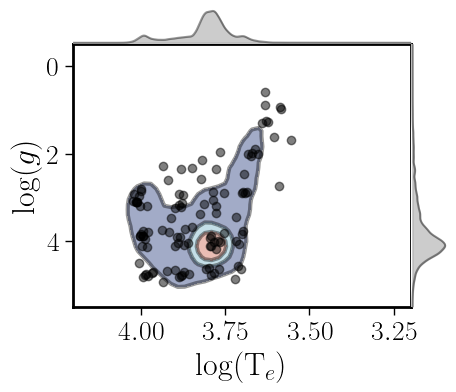

In [20]:
mask = (tab['FNORM']>0) & (mask_SN)
mask_few = tab_few['FNORM']>0*1e-16 

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],color='k',edgecolor=None,alpha=0.5)
print(len(tab_few['TEFF'][mask_few]))

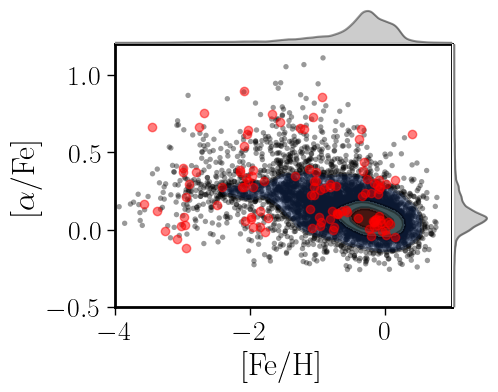

In [21]:
mask = tab['FNORM']>0 & mask_SN
mask_few = tab_few['FNORM']>0
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=1,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='r',edgecolor=None,alpha=0.5)



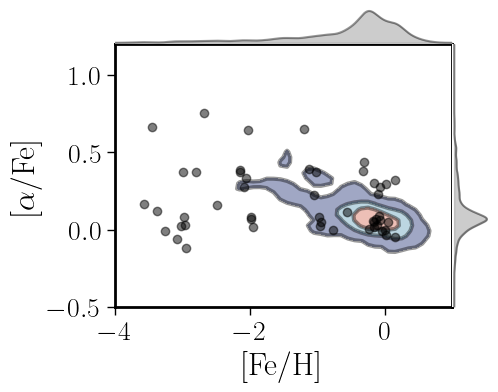

In [22]:
mask = (tab['FNORM']>1000*1e-16) & mask_SN
mask_few = tab_few['FNORM']>1000*1e-16
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='k',edgecolor=None,alpha=0.5)


1011


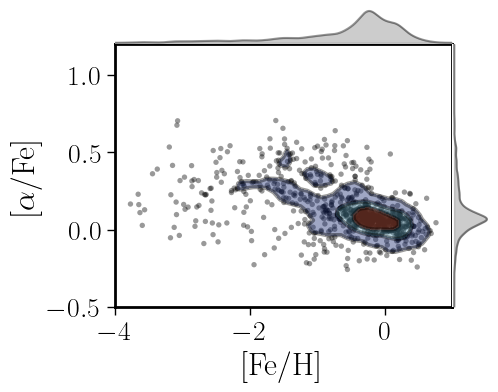

In [23]:
mask = (tab['FNORM']>1000*1e-16) & (mask_SN)
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=1,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

3244


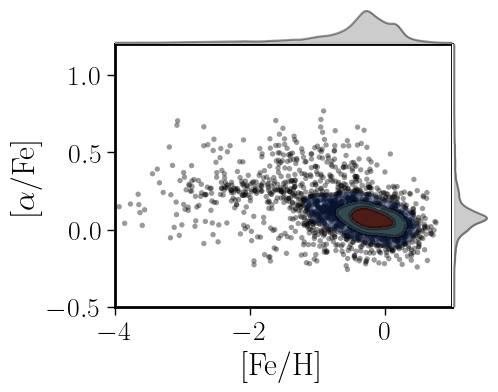

In [24]:
mask = (tab['FNORM']>200*1e-16) & mask_SN
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=1,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

1887


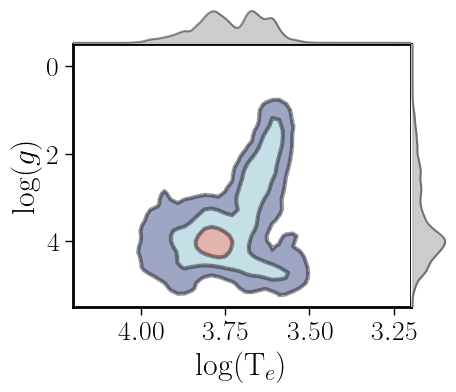

In [25]:
mask = tab['MET']>0
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

342


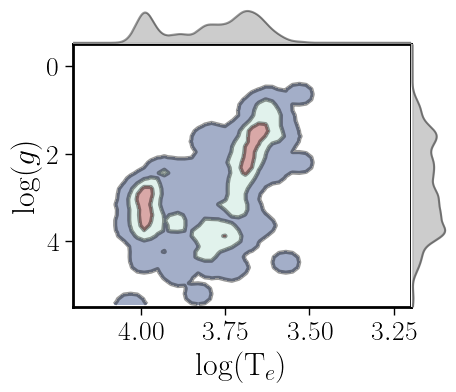

In [26]:
mask = tab['MET']<-2
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

1654


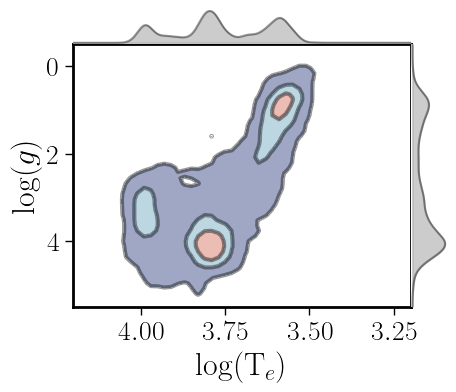

In [27]:
mask = tab['FNORM']>1000*1e-16
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

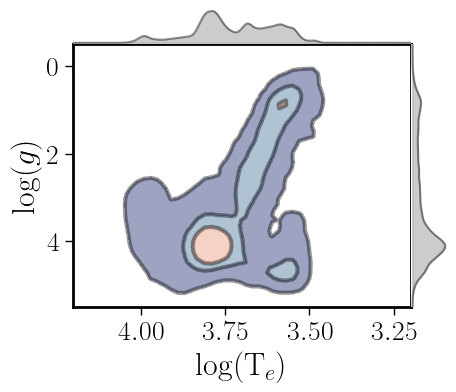

In [28]:
fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'],y_par=tab['LOGG'],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))


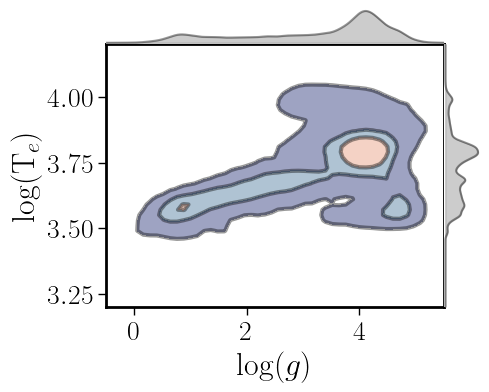

In [29]:
fig,ax,mean,std=comp_plot_hist(x_par=tab['LOGG'],y_par=tab['TEFF'],\
          x_label=r'log($g$)', y_label=r'log(T$_e$)', 
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-0.5,x_max=5.5, y_min=3.2, y_max=4.2,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))


43


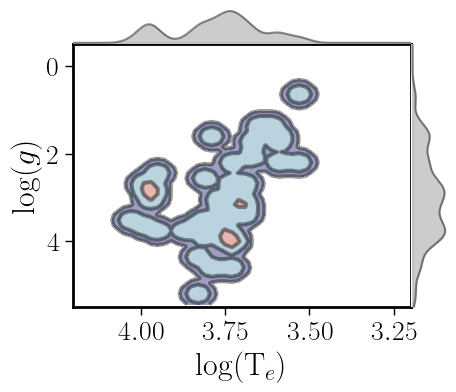

In [30]:
mask = tab['FNORM']>0

mask = mask & (tab['MET']<-3)

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
print(len(tab['TEFF'][mask]))

In [31]:
#mask_flux = tab['FNORM']>500*1e-16   
print(len(tab['MET'][mask_flux]))
mets=find_bins_fix(tab['MET'][mask_flux], 200, 0.15)
print(mets)
print(len(mets))
print(mets)

9604
[-3.9379308, -2.365533, -2.2149048, -2.06414, -1.9123911, -1.7593908, -1.6091365, -1.4586722, -1.308528, -1.1583865, -1.0074534, -0.85732406, -0.7070442, -0.55669516, -0.4064999, -0.25634056, -0.106178425, 0.04388492, 0.19411393, 0.34481317, 0.49495265, 0.6526761, 0.76929116]
23
[-3.9379308, -2.365533, -2.2149048, -2.06414, -1.9123911, -1.7593908, -1.6091365, -1.4586722, -1.308528, -1.1583865, -1.0074534, -0.85732406, -0.7070442, -0.55669516, -0.4064999, -0.25634056, -0.106178425, 0.04388492, 0.19411393, 0.34481317, 0.49495265, 0.6526761, 0.76929116]


In [42]:
#-1000 -1.1026284 300
#-1.1026284 -0.95080054 72
#-0.95080054 -0.8003126 83
#-0.8003126 -0.6501008 99
#-0.6501008 -0.5000529 200
#-0.5000529 -0.3493666 395
#-0.3493666 -0.19885609 633
#-0.19885609 -0.047848035 440
#-0.047848035 0.10279064 371
#0.10279064 0.25283742 291
#0.25283742 0.4044241 96
#0.4044241 0.55542624 35
#0.55542624 1000 22
#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))
mets=np.array((-1000,-1.7,-0.80,-0.45,-0.27,-0.05,0.15,0.3,1000))
print(len(mets))


9


-1000.0 -1.7 482
-1.7 -0.8 1358
-0.8 -0.45 1524
-0.45 -0.27 1806
-0.27 -0.05 2181
-0.05 0.15 1432
0.15 0.3 607
0.3 1000.0 214
4 12


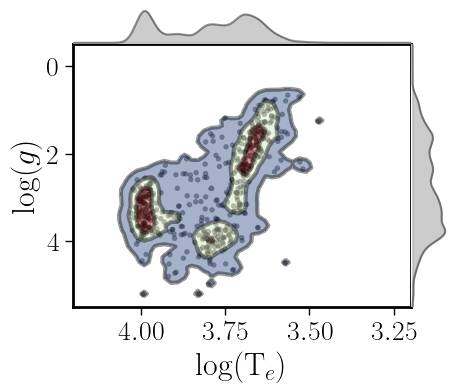

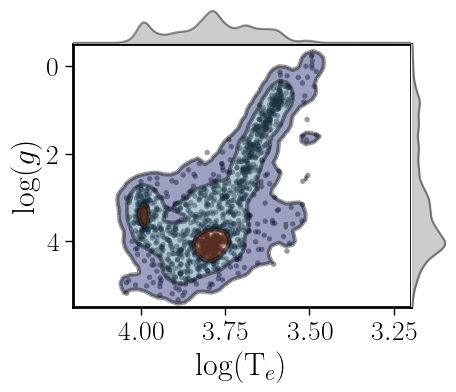

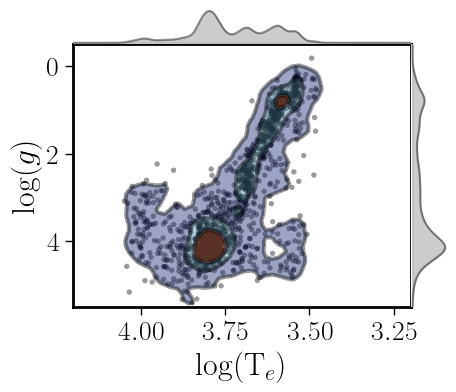

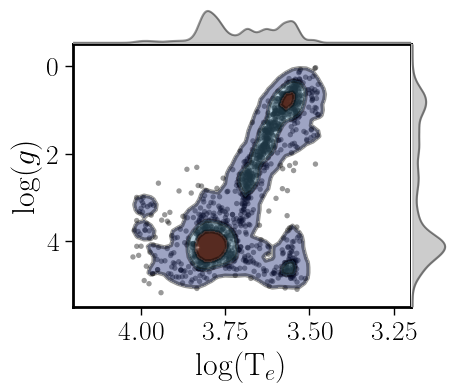

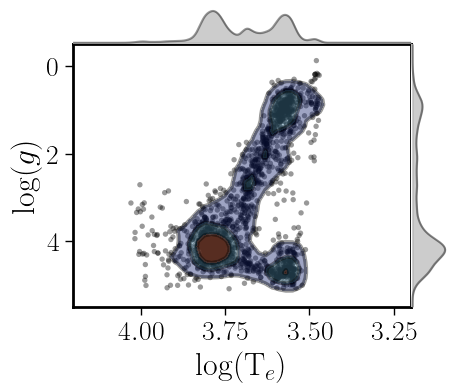

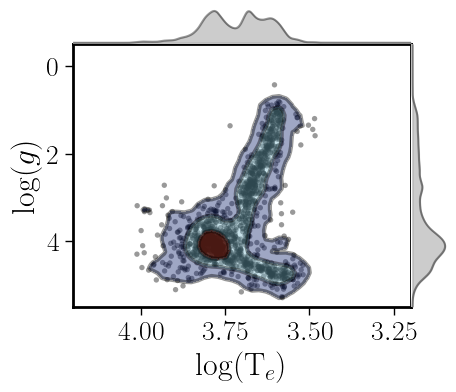

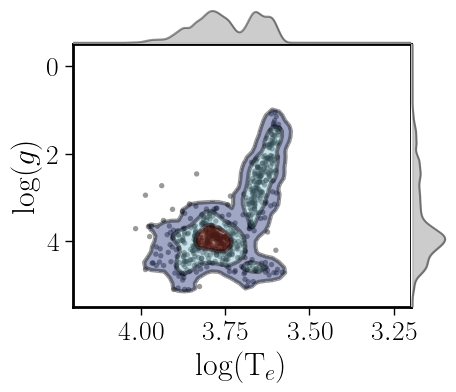

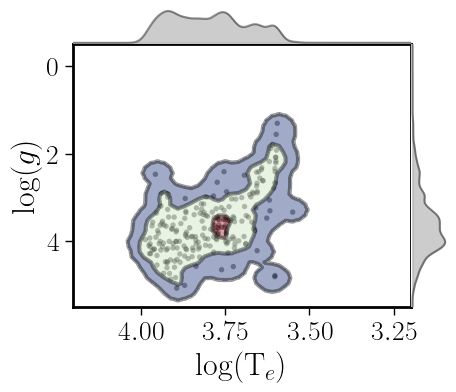

In [43]:
#mask_flux = tab['FNORM']>500*1e-16   

for I in np.arange(len(mets)-1):
    met_min=mets[I]
    met_max=mets[I+1]
    mask = mask_flux & (tab['MET']>met_min) & (tab['MET']<met_max)
    print(met_min,met_max,len(tab['TEFF'][mask]))
    fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
                                   x_label=r'log(T$_e$)', y_label=r'log($g$)',
                                   c_main='black',alpha=0.4,scatter=1,\
                                   x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                                   x_r=1,y_r=1,
                                   equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
   
    
lTes=np.arange(3.2,4.2,0.25)
lgs=np.arange(-0.5,5.5,0.5)
print(len(lTes),len(lgs))


In [44]:
#lTes=np.arange(3.2,4.2,0.1)
#lgs=np.arange(-0.5,5.5,0.5)
#print(len(lTes),len(lgs))

#
# ~500 binned stars!
#

#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))

#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))


lTes=find_bins_fix(tab['TEFF'][mask_flux], 200, 0.05)
lTes[0]=-1000
lTes[-1]=1000
print(len(lTes),':',lTes)

lgs=find_bins_fix(tab['LOGG'][mask_flux], 200, 0.5)
lgs[0]=-1000
lgs[-1]=1000
print(len(lgs),':',lgs)



13 : [-1000, 3.5301635, 3.580172, 3.6302223, 3.6802504, 3.7304864, 3.7805316, 3.830563, 3.8806329, 3.9310234, 3.981164, 4.0326905, 1000]
12 : [-1000, 0.58567536, 1.0860683, 1.5863264, 2.0863914, 2.586686, 3.087443, 3.5874753, 4.0875473, 4.5875587, 5.091378, 1000]


In [73]:
#params={}
#tab_mean=Table(names=tab.columns)
#tab_mean.add_column(name='N_ST')
#N_ST=[]
keyList=['N_ST','TEFF','LOGG','MET','ALPHAM','FNORM']#,'e_TEFF','e_LOGG','e_MET','e_ALPHAM','e_FNORM']
params_mean = []
#for i in keyList:
#    params[i] = None

I=0
for Imets in np.arange(len(mets)-1):
    met_min=mets[Imets]
    met_max=mets[Imets+1]
    met_min=met_min-0.001*np.abs(met_min)
    met_max=met_max+0.001*np.abs(met_max)
    for IlTes in np.arange(len(lTes)-1):
        lTes_min=lTes[IlTes]
        lTes_max=lTes[IlTes+1]
        lTes_min=lTes_min-0.001*np.abs(lTes_min)
        lTes_max=lTes_max+0.001*np.abs(lTes_max)
        for Ilgs in np.arange(len(lgs)-1):
            lgs_min=lgs[Ilgs]
            lgs_max=lgs[Ilgs+1]
            lgs_min=lgs_min-0.001*np.abs(lgs_min)
            lgs_max=lgs_max+0.001*np.abs(lgs_max)
            mask = mask_flux & mask_SN            
            mask = mask & (tab['MET']>met_min) & (tab['MET']<=met_max)
            mask = mask & (tab['TEFF']>lTes_min) & (tab['TEFF']<=lTes_max)
            mask = mask & (tab['LOGG']>lgs_min) & (tab['LOGG']<=lgs_max)
            tab_sel=tab[mask]
            n_sel=len(tab_sel)
            params = {}
            if (n_sel>0):
                params['N_ST']=n_sel
                for cols in tab_sel.columns:
                    params[cols]=np.mean(tab_sel[cols])
                params_mean.append(params)
                
                #
                # Average spectra!
                #
                spectra=hdu[0].data[mask]                
                spec=np.mean(spectra,axis=0)
                e_spec=np.std(spectra,axis=0)
                if (I==0):
                    rss=spec
                else:
                    rss= np.vstack((rss, spec))
                    print(I,rss.shape)
                I=I+1

#                print(params_mean)

tab_mean=Table()
for key in keyList:
    vals=[]
    for i in np.arange(len(params_mean)):
        #print(i,params_mean[i][key])
        vals.append(params_mean[i][key])
    #print(key,vals)
    tab_mean.add_column(vals,name=key)

tab_mean

1 (2, 6351)
2 (3, 6351)
3 (4, 6351)
4 (5, 6351)
5 (6, 6351)
6 (7, 6351)
7 (8, 6351)
8 (9, 6351)
9 (10, 6351)
10 (11, 6351)
11 (12, 6351)
12 (13, 6351)
13 (14, 6351)
14 (15, 6351)
15 (16, 6351)
16 (17, 6351)
17 (18, 6351)
18 (19, 6351)
19 (20, 6351)
20 (21, 6351)
21 (22, 6351)
22 (23, 6351)
23 (24, 6351)
24 (25, 6351)
25 (26, 6351)
26 (27, 6351)
27 (28, 6351)
28 (29, 6351)
29 (30, 6351)
30 (31, 6351)
31 (32, 6351)
32 (33, 6351)
33 (34, 6351)
34 (35, 6351)
35 (36, 6351)
36 (37, 6351)
37 (38, 6351)
38 (39, 6351)
39 (40, 6351)
40 (41, 6351)
41 (42, 6351)
42 (43, 6351)
43 (44, 6351)
44 (45, 6351)
45 (46, 6351)
46 (47, 6351)
47 (48, 6351)
48 (49, 6351)
49 (50, 6351)
50 (51, 6351)
51 (52, 6351)
52 (53, 6351)
53 (54, 6351)
54 (55, 6351)
55 (56, 6351)
56 (57, 6351)
57 (58, 6351)
58 (59, 6351)
59 (60, 6351)
60 (61, 6351)
61 (62, 6351)
62 (63, 6351)
63 (64, 6351)
64 (65, 6351)
65 (66, 6351)
66 (67, 6351)
67 (68, 6351)
68 (69, 6351)
69 (70, 6351)
70 (71, 6351)
71 (72, 6351)
72 (73, 6351)
73 (74, 6

N_ST,TEFF,LOGG,MET,ALPHAM,FNORM
int64,float32,float32,float32,float32,float32
1,3.5306635,0.6985106,-3.8562768,0.041332126,5.017122e-14
1,3.5306635,0.6985106,-3.8562768,0.041332126,5.017122e-14
2,3.5772748,1.498644,-2.1849434,0.19588731,3.6893464e-15
1,3.5833206,1.6240178,-2.0674412,0.23114388,1.07435076e-14
4,3.6228573,0.90888005,-2.2334502,0.24130939,2.7532118e-14
11,3.6205633,1.3542825,-2.3392448,0.2193107,3.0902178e-14
3,3.60011,1.6515646,-2.6600215,0.1762525,1.9431505e-14
6,3.6446364,0.9456149,-2.3778713,0.2848778,2.3751849e-14
24,3.6495419,1.4164705,-2.3535726,0.23924963,2.5019325e-14


In [74]:
print(rss.shape)
print(hdu[0].data.shape)
print(len(tab_mean))
hdu.info()

(341, 6351)
(9795, 6351)
341
Filename: /disk-a/sanchez/LVM/LVM/templates//stellar-basis-spectra-9795.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (6351, 9795)   float32   
  1  PARAMETERS    1 BinTableHDU     24   9795R x 5C   ['E', 'E', 'E', 'E', 'E']   


In [75]:
n_st=len(tab_mean)
out_file_rss=f'mstar-stlib-n{n_st}-SN{SN_lim}.fits.gz'
hdu_rss = fits.PrimaryHDU(rss,header=hdu[0].header)
hdu_tab = fits.BinTableHDU(tab_few,name='PARAMETERS')
hdu_list =fits.HDUList([hdu_rss,hdu_tab])
hdu_list.writeto(out_file_rss,overwrite=True)
#hdu[0].data=rss
#hdu[1]=table_to_hdu(tab_few)

341
341


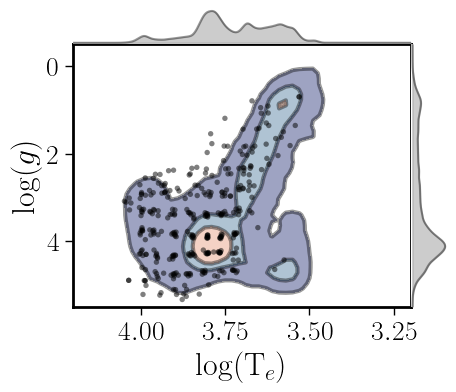

In [76]:
tab_few=tab_mean
mask = tab['FNORM']>0
mask_few = tab_few['FNORM']>0

fig,ax,mean,std=comp_plot_hist(x_par=tab['TEFF'][mask],y_par=tab['LOGG'][mask],\
          x_label=r'log(T$_e$)', y_label=r'log($g$)',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=3.2,x_max=4.2,y_min=-0.5,y_max=5.5,
                               x_r=1,y_r=1,
                               equal=1,one=1,conts=[0.95,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],
#           c=tab_few['MET'][mask_few],edgecolor='None',s=15,alpha=0.5)
ax.scatter(tab_few['TEFF'][mask_few],tab_few['LOGG'][mask_few],color='k',
           edgecolor='None',s=15,alpha=0.5)
print(len(tab_few['TEFF'][mask_few]))
print(len(tab_mean[mask_few]))
plt.show()

341


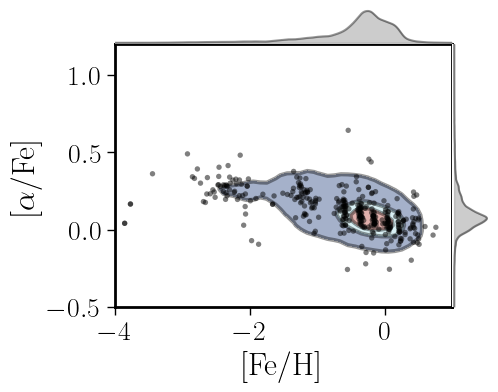

In [77]:
mask = tab['FNORM']>0
mask_few = tab_few['FNORM']>0
fig,ax,mean,std=comp_plot_hist(x_par=tab['MET'][mask],y_par=tab['ALPHAM'][mask],\
          x_label=r'[Fe/H]', y_label=r'[$\alpha$/Fe]',
          c_main='black',alpha=0.4,scatter=0,\
                               x_min=-4.0,x_max=1.0,y_min=-0.5,y_max=1.2,
                               x_r=0,y_r=0,
                               equal=1,one=1,conts=[0.99,0.65,0.25,0.0],fsize=(4.5,3.5))
#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],
#           c=tab_few['TEFF'][mask_few],edgecolor='None',s=15,alpha=0.5)
ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],
           color='k',edgecolor='None',s=15,alpha=0.5)

#ax.scatter(tab_few['MET'][mask_few],tab_few['ALPHAM'][mask_few],color='r',s=15,edgecolor='None',alpha=0.5)
print(len(tab_mean[mask_few]))


In [72]:
#mets=np.array((-1000,-1.7,-1.10,-0.80,-0.6,-0.45,-0.35,-0.27,-0.20,-0.05,0.10,0.25,1000))

lTes=find_bins_fix(tab['TEFF'][mask_flux], 200, 0.05)
lTes[0]=-1000
lTes[-1]=1000
print(len(lTes),':',lTes)

lgs=find_bins_fix(tab['LOGG'][mask_flux], 200, 0.5)
lgs[0]=-1000
lgs[-1]=1000
print(len(lgs),':',lgs)



13 : [-1000, 3.5301635, 3.580172, 3.6302223, 3.6802504, 3.7304864, 3.7805316, 3.830563, 3.8806329, 3.9310234, 3.981164, 4.0326905, 1000]
12 : [-1000, 0.58567536, 1.0860683, 1.5863264, 2.0863914, 2.586686, 3.087443, 3.5874753, 4.0875473, 4.5875587, 5.091378, 1000]


In [41]:
print(SN_lim)

10
